In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn.preprocessing import StandardScaler
from class_vehicle_data import Vehicle_data

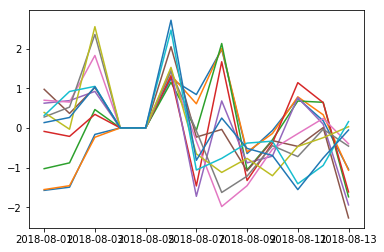

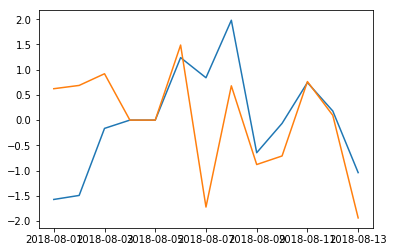

In [15]:
output = ["output_t0","output_t10","output_t20","output_t30","output_t40","output_t50","output_t60","output_t70","output_t80","output_t90","output_t100"]
car_company = ["BMW","Ford","Mercedes","Porsche","Tesla","Toyota"]


# Initialize all car data
all_cars = [Vehicle_data() for k in range(len(output))]


# Read in all the data for a specific vehicle
for k in range(len(all_cars)):
    file = "data/"+output[k]+"/"+car_company[4]+"_daily_data.txt"
    car = all_cars[k]
    car.read_in_data(file)
    car.fill_NA()
    y_pos,y_neg,y_neu =car.scale_data_Ztransform()
    #y_pos,y_neg,y_neu =car.scale_data_MinMaxTransform(Xmin=-1,Xmax=1)
    plt.plot(car.car_data["Dates"],y_pos)
    

plt.show()
y_pos1,y_neg1,y_neu1 =all_cars[0].scale_data_Ztransform()
y_pos2,y_neg2,y_neu2 =all_cars[4].scale_data_Ztransform()
#y_pos,y_neg,y_neu=BMW.scale_data_MinMaxTransform(Xmin=-1.0,Xmax=1.0)

#y_scaled = scaler.transform(BMW.car_data["Daily_pos_percent"])
plt.plot(all_cars[0].car_data["Dates"],y_pos1)
plt.plot(all_cars[0].car_data["Dates"],y_pos2)

#plt.plot(all_cars[0].car_data["Dates"],y_neg)

# We will combine all curves for different thresholds          
 
 
<p></p>

<font size="3">
   
In order to combine the curves $\hat{y}(x)$ with different thresholds, we will compute the expectation value of a curve $\hat{y}(x)$, which is either the negative or positive sentiment curves, given that $y=\hat{y}$ (ie. that the estimate $\hat{y}$ is the same as the true value $y$). The marginalization of the different curves, goes as follows

\begin{align}
\langle \hat{y}(x) \rangle &= \int dT \ \hat{y}(x,T) P(\hat{y},y=\hat{y},T) \\
&= \int dT \ \hat{y}(x,T)P(\hat{y}|y=\hat{y},T) P(y=\hat{y},T) \\
&= \int dT \ \hat{y}(x,T)P(\hat{y}|y=\hat{y},T) P(y=\hat{y}|T)P(T)  
\end{align}

For the puposes of our analysis, we will assume a uniform probablity distribution for $T$. 

---
---

To better understand this formula, we will explicitly write out the integral over $T$ for both the positive $\text{Pos}(x)$ and negative $\text{Neg}(x)$ curves and discuss the individual probabilitiy density functions in the integrand


\begin{align}
\langle \text{Pos}(x) \rangle &= \int dT \ \text{Pos}(x,T)P(\hat{y}=1|y=1,T) P(y=1|T)P(T)  \\
\langle \text{Neg}(x) \rangle &= \int dT \ \text{Neg}(x,T)P(\hat{y}=-1|y=-1,T) P(y=-1|T)P(T)  
\end{align}




The probability $P(\hat{y}=1|y=1,T)$ is the probability of the model classifying the sentiment as positive, given that the real sentiment is also positive, for a given threshold. This is known as the precision of the classifier.

The probability $P(y=1|T)$ is simply the probability that a given sentiment is positive, given a value of T. 


Similarly, $P(\hat{y}=-1|y=-1,T)$ is the probability of the model classifying the sentiment as negative, given that the real sentiment is also negative, for a given threshold and $P(y=-1|T)$ is the probability that a given sentiment is negative, given a value of T.


---
---

## Assumptions

In order to carry out this analysis, we will assume that the probability densities, $P(\hat{y}=1|y=1,T),P(\hat{y}=-1|y=-1,T)$  and  $P(y=1|T),P(y=-1|T)$ are the same as the values from when we tested our models on the labelled twitter data.


</font>

In [16]:
# Let us read in the data from the 
file = "sentiment_model_tweet_test_scores.txt"
f = open(file,mode="r")
f.readline()

T=[] # The threshold value
Tp_N=[]
Tn_N=[]
Fp_N=[]
Fn_N=[]


for line in f:
    tokens = line.split()
    T.append(float(tokens[0]))
    Tp_N.append(float(tokens[6]))
    Fp_N.append(float(tokens[7]))
    Tn_N.append(float(tokens[8]))
    Fn_N.append(float(tokens[9]))

T = np.asarray(T)
Tp_N =np.asarray(Tp_N)
Tn_N = np.asarray(Tn_N)
Fp_N =np.asarray(Fp_N)
Fn_N =np.asarray(Fn_N)

prob_tp = np.zeros(len(T))
prob_pos = np.zeros(len(T))

prob_tn = np.zeros(len(T))
prob_neg =np.zeros(len(T))

for k in range(len(T)):
    prob_pos[k] = (Tp_N[k]+Fn_N[k])/(Tp_N[k]+Fp_N[k]+Tn_N[k]+Fn_N[k])
    prob_neg[k] = (Tn_N[k]+Fp_N[k])/(Tp_N[k]+Fp_N[k]+Tn_N[k]+Fn_N[k])
    prob_tp[k] = Tp_N[k]/(Tp_N[k]+Fp_N[k])
    prob_tn[k] = Tn_N[k]/(Tn_N[k]+Fn_N[k])



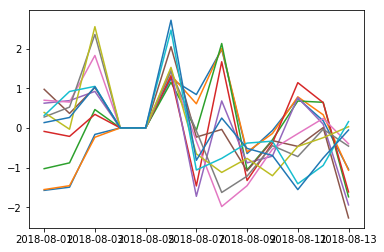

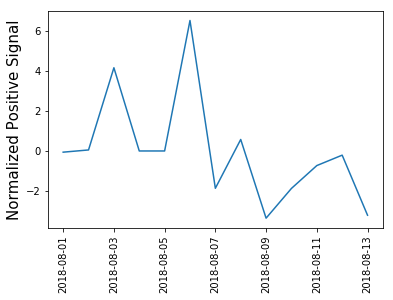

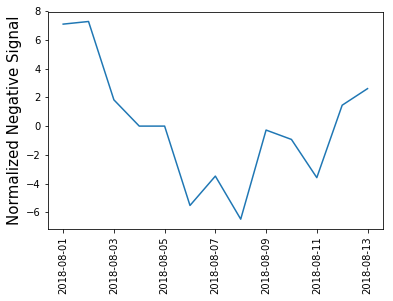

In [17]:
# Now We combine all of the curves
y_pos_tot = np.zeros(len(all_cars[0].car_data["Dates"]))
y_neg_tot = np.zeros(len(all_cars[0].car_data["Dates"]))
y_neu_tot = np.zeros(len(all_cars[0].car_data["Dates"]))


for k in range(len(all_cars)):
    #y_pos,y_neg,y_neu =all_cars[k].scale_data_Ztransform()
    #y_pos_raw,y_neg_raw,y_neu_raw = all_cars[k].return_sentiment_data()
    #y_tot = (y_pos-y_neg)
    y_pos,y_neg,y_neu =all_cars[k].scale_data_Ztransform()
    #y_pos,y_neg,y_neu =all_cars[k].scale_data_MinMaxTransform(Xmin=-1,Xmax=1)
    plt.plot(all_cars[0].car_data["Dates"],y_pos)

    y_pos_tot += prob_pos[k]*prob_tp[k]*y_pos
    y_neg_tot += prob_neg[k]*prob_tn[k]*y_neg
    
plt.show()
plt.plot(all_cars[0].car_data["Dates"],y_pos_tot)
plt.ylabel("Normalized Positive Signal",size=15)
plt.xticks(rotation='vertical')
plt.show()

plt.plot(all_cars[0].car_data["Dates"],y_neg_tot)
plt.ylabel("Normalized Negative Signal",size=15)
plt.xticks(rotation='vertical')
plt.show()